# Viewing the dataset

This notebook demonstrates how to access metadata and arrays from the HDF5 dataset.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the dataset

Make sure to update the filepath in the block below!

In [ ]:
h5_filepath = '/data/bwedig/mejiro/h5_export/roman_hlwas_v_1_0_0.h5'  # TODO update this path!
f = h5py.File(h5_filepath, 'r')

The dataset is structured in the following way:

* `images`
    * `strong_lens_00000001`
        * `exposure_00000001_F106` dataset with the F106 exposure, a (91, 91) array
        * `exposure_00000001_F129`
        * ...
        * `snr_array_00000001` dataset with the SNR per pixel, a (91, 91) array
* `psfs`
    * `sca01`
        * `psf_1_1126_1126_F106` dataset with the PSF kernel, a (505, 505) array
        * `psf_1_1226_1226_F129`
        * ...
    * `sca02`
    * ...

In [3]:
# print all attributes for the root group
for key, value in f.attrs.items():
    print(f"{key}: {value}")

author: ['bwedig@metis.physics.wustl.edu' 'username@host for calculation']
created: 2025_05_10-11_24_20_AM
mejiro_version: ['1.0.0' 'mejiro version']


# The `images` group

This group contains metadata about each strong lens system (e.g., redshifts, Einstein radius, SNR, etc.) and synthetic images and exposures for each filter.

In [4]:
# print all attributes for the "images" group
for key, value in f['images'].attrs.items():
    print(f"{key}: {value}")

galsim_version: ['2.5.1' 'GalSim version']
lenstronomy_version: ['1.11.10' 'lenstronomy version']
mejiro_version: ['1.0.0' 'mejiro version']
webbpsf_version: ['1.4.0' 'WebbPSF version']


## Retrieve the metadata for a given system

We'll look at the system with unique identifier 14

In [5]:
# select a system by the unique identifier assigned to it by mejiro
uid = f'{str(14).zfill(8)}'  # for this version of the dataset, it's a zero-padded string of eight digits

# print all attributes for the "strong_lens" group
for key, value in f['images'][f'strong_lens_{uid}'].attrs.items():
    print(f"{key}: {value}")

d_l: ['1.8712168085429377' 'Comoving distance to lens galaxy [Gpc]']
d_ls: ['3.131825793954902' 'Comoving distance between lens and source [Gpc]']
d_s: ['5.00304260249784' 'Comoving distance to source galaxy [Gpc]']
detector: ['1' 'Detector']
detector_position_x: ['1226' 'Detector X position']
detector_position_y: ['1226' 'Detector Y position']
exposure_time: ['146' 'Exposure time [seconds]']
instrument: ['WFI' 'Instrument']
log_mhigh: ['10' 'Upper mass limit for subhalos [log10(M_sun)]']
log_mlow: ['6' 'Lower mass limit for subhalos [log10(M_sun)]']
main_halo_mass: ['2250987181297.3013' 'Lens galaxy main halo mass [M_sun]']
mejiro_version: ['1.0.0' 'mejiro version']
mu: ['7.988988747989958' 'Flux-weighted magnification of source']
num_images: ['2' 'Number of images formed by the system']
num_subhalos: ['412' 'Number of subhalos']
r_tidal: ['0.5' 'See pyHalo documentation']
sigma_sub: ['0.055' 'See pyHalo documentation']
sigma_v: ['225.37591724025367' 'Lens galaxy velocity dispersion [

## View exposure

filter: ['F129' 'Filter']
fov: ['10.01' 'Field of view [arcsec]']
lens_magnitude: ['20.177757023308793' 'Lens galaxy AB magnitude']
lensed_source_magnitude: ['21.12838040273455' 'Lensed source galaxy AB magnitude']
pixel_scale: ['0.11' 'Pixel scale [arcsec/pixel]']
source_magnitude: ['23.384609926438007' 'Unlensed source galaxy AB magnitude']
units: ['Counts/sec' 'Units of pixel values']


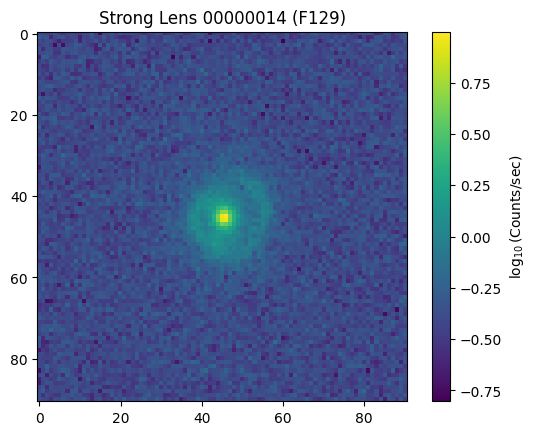

In [6]:
# specify band
band = 'F129'

# retrieve exposure
exposure = f['images'][f'strong_lens_{uid}'][f'exposure_{uid}_{band}']

# print all attributes for this dataset
for key, value in exposure.attrs.items():
    print(f"{key}: {value}")

# show exposure
plt.imshow(np.log10(exposure))
plt.colorbar(label=r'$\log_{10}(\text{Counts/sec})$')
plt.title(f'Strong Lens {uid} ({band})')
plt.show()

# View SNR array

Each pixel is the SNR in that pixel (see paper for how we compute SNR). The region(s) where per pixel SNR > 1 are where the overall SNR of the system is calculated from, as well as where we additionally supersample by a factor of three to get the flux sufficiently accurate. See the paper for details.

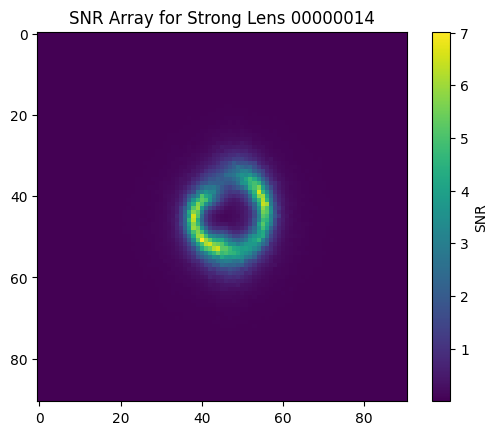

In [7]:
# retrieve SNR array
snr_array = f['images'][f'strong_lens_{uid}'][f'snr_array_{uid}']

# show SNR array
plt.imshow(snr_array)
plt.colorbar(label='SNR')
plt.title(f'SNR Array for Strong Lens {uid}')
plt.show()

# The `psfs` group

This group contains the PSFs

In [8]:
# print all attributes for the "psfs" group
for key, value in f['psfs'].attrs.items():
    print(f"{key}: {value}")

mejiro_version: ['1.0.0' 'mejiro version']
webbpsf_version: ['1.4.0' 'WebbPSF version']


## View a PSF

We'll retrieve the PSF associated with the image we looked at above.

In [9]:
# retrieve the detector and detector position metadata, which are attributes on the "strong_lens" group
detector = f['images'][f'strong_lens_{uid}'].attrs['detector'][0]
detector_position_x = f['images'][f'strong_lens_{uid}'].attrs['detector_position_x'][0]
detector_position_y = f['images'][f'strong_lens_{uid}'].attrs['detector_position_y'][0]

print(f"Detector: {detector}")
print(f"Detector Position (x): {detector_position_x}")
print(f"Detector Position (y): {detector_position_y}")

Detector: 1
Detector Position (x): 1226
Detector Position (y): 1226


detector: ['1' 'Detector']
detector_position_x: ['1226' 'Detector X position']
detector_position_y: ['1226' 'Detector Y position']
fov_pixels: ['101' 'See WebbPSF documentation']
mejiro_version: ['1.0.0' 'mejiro version']
oversample: ['5' 'See WebbPSF documentation']


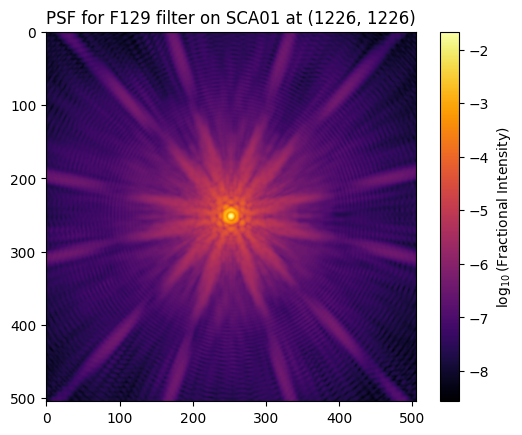

In [10]:
# retrieve the PSF
psf = f['psfs'][f'sca{str(detector).zfill(2)}'][f'psf_{detector}_{detector_position_x}_{detector_position_y}_{band}']

# print all attributes for this dataset
for key, value in psf.attrs.items():
    print(f"{key}: {value}")

# show PSF
plt.imshow(np.log10(psf), cmap='inferno')
plt.colorbar(label=r'$\log_{10}(\text{Fractional Intensity})$')
plt.title(f'PSF for {band} filter on SCA{str(detector).zfill(2)} at ({detector_position_x}, {detector_position_y})')
plt.show()